# Model Training

### Importing pandas,numpy,Matplotlib,seaborn and warnings

In [1]:
#Basic Importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#modeling
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

# import the csv Data as Pandas Dataframe


In [2]:
df=pd.read_csv('stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Preparing for x variable and y variable

In [4]:
x=df.drop('math_score',axis=1)

In [5]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y=df['math_score']

# feature engineering

In [7]:
#Creating column Transformer with 3 datatypes
num_features=x.select_dtypes(exclude='object').columns
cat_feature=x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
             [
                 ('OneHotEncoder',oh_transformer,cat_feature),
                 ('StandardScaler',numeric_transformer,num_features)
             ])


In [8]:
x=preprocessor.fit_transform(x)

In [9]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [10]:
x.shape

(1000, 19)

In [11]:
#Separate the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape

((700, 19), (300, 19))

In [12]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)
    
    #make prediction
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    #evaluvating the model
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    
    print("-------------------------")
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2543
- Mean Absolute Error: 4.1943
- R2 Score: 0.8748
-------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5688
- Mean Absolute Error: 4.4297
- R2 Score: 0.8754


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5106
- Mean Absolute Error: 5.1582
- R2 Score: 0.8078
-------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8705
- Mean Absolute Error: 5.3929
- R2 Score: 0.8103


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2487
- Mean Absolute Error: 4.1977
- R2 Score: 0.8751
-------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5566
- Mean Absolute Error: 4.4155
- R2 Score: 0.8759


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.6822
- Mean Absolute Error: 4.5157
- R2 Score: 0.8536
-------------------------
Model performance for Te

In [14]:
model_list

['Linear Regression',
 'Lasso',
 'Ridge',
 'K-Neighbors Regressor',
 'Decision Tree',
 'Random Forest Regressor',
 'XGBRegressor',
 'CatBoosting Regressor',
 'AdaBoost Regressor']

In [15]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model name','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Model name,R2 Score
2,Ridge,0.875907
0,Linear Regression,0.875363
7,CatBoosting Regressor,0.852108
5,Random Forest Regressor,0.845916
6,XGBRegressor,0.842395
8,AdaBoost Regressor,0.835218
1,Lasso,0.810281
3,K-Neighbors Regressor,0.773797
4,Decision Tree,0.735073


# Linear Regression

In [16]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_pred,y_test)*100
print("the accuracy of model is {}".format(score))

the accuracy of model is 86.36584039118048


# Ploting y_pred and ploting x_test


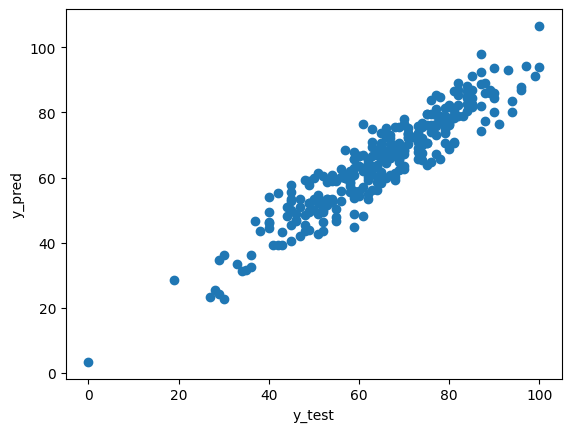

In [17]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

<AxesSubplot: xlabel='math_score'>

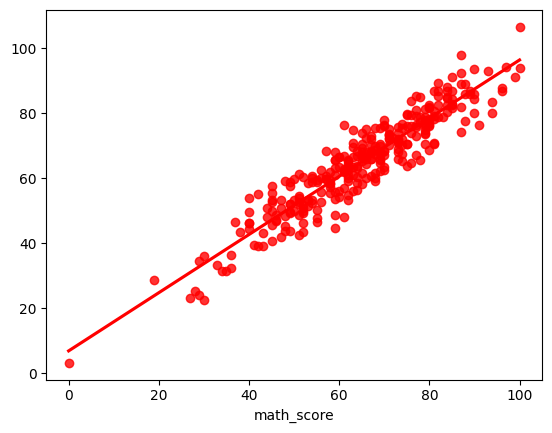

In [18]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

# Difference between actual and predicted values

In [19]:
pred_df=pd.DataFrame({'Actual_values':y_test,'predicted_values':y_pred,'Differnce':y_test-y_pred})

In [20]:
pred_df

,Actual_values,predicted_values,Differnce
521,91,76.56250,14.43750
737,53,58.71875,-5.71875
740,80,76.93750,3.06250
660,74,76.81250,-2.81250
411,84,88.12500,-4.12500
...,...,...,...
468,77,73.00000,4.00000
935,70,62.50000,7.50000
428,65,58.37500,6.62500
7,40,44.53125,-4.53125


<AxesSubplot: ylabel='Density'>

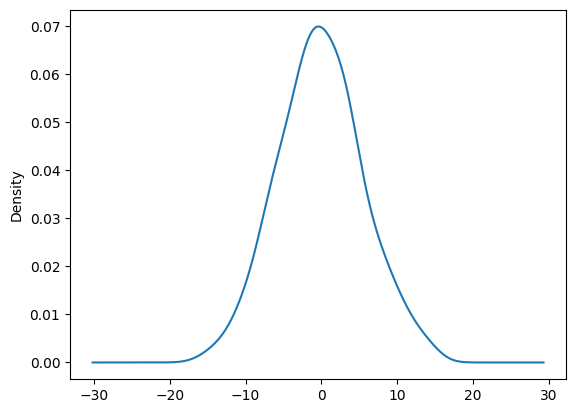

In [21]:
pred_df['Differnce'].plot(kind='kde')

In [22]:
#since residuals are in normal distrubution and model is good